In [1]:
# Program to Derive Correlation from Citibike Data

### Initially I tried to derive correlation between the Age and average trip duration for each age group. But I was not succesful on that effort so I went ahead and derived a correlation between the type of customer and Citibike Usage.

### By observing the data I found out that during the weekdays Subscribers utilize more Citibike than the Customers and viz.

## Problem Statement: Does Subscribers take more rides on weekdays than Customers?

## Alternate Hypothesis:  Subscribers take more rides on Citibikes more than Customers during Weekdays.

## Null Hypothesis: Customers take the same or more number of rides than Subscribers during Weekdays.



In [2]:
# Program to Derive Correlation from Citibike Data
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import datetime
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
# Reading from CSV File
df = pd.read_csv('/gws/open/Student/citibike/201701-citibike-tripdata.csv.zip')

In [4]:
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [5]:
# Adding a new Column Date
df['date'] = pd.to_datetime(df['Start Time'])

In [6]:
df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,date
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2,2017-01-01 00:00:21
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2,2017-01-01 00:00:45
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0,2017-01-01 00:00:57
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0,2017-01-01 00:01:10
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0,2017-01-01 00:01:25


In [7]:
df.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'date'],
      dtype='object')

In [8]:
# Dropping Unnecessary Columns
df.drop(['Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID'], axis=1, inplace=True)

In [9]:
df.columns

Index(['Trip Duration', 'User Type', 'Birth Year', 'Gender', 'date'], dtype='object')

In [10]:
df.head()

,Trip Duration,User Type,Birth Year,Gender,date
0,680,Subscriber,1965.0,2,2017-01-01 00:00:21
1,1282,Subscriber,1987.0,2,2017-01-01 00:00:45
2,648,Customer,NaN,0,2017-01-01 00:00:57
3,631,Customer,NaN,0,2017-01-01 00:01:10
4,621,Customer,NaN,0,2017-01-01 00:01:25


In [11]:
#df = df.dropna()

In [12]:
df['Age'] = 2017 - df['Birth Year']

In [13]:
#df['Age'] = df['Age'].dropna()

In [14]:
df.head()

,Trip Duration,User Type,Birth Year,Gender,date,Age
0,680,Subscriber,1965.0,2,2017-01-01 00:00:21,52.0
1,1282,Subscriber,1987.0,2,2017-01-01 00:00:45,30.0
2,648,Customer,NaN,0,2017-01-01 00:00:57,NaN
3,631,Customer,NaN,0,2017-01-01 00:01:10,NaN
4,621,Customer,NaN,0,2017-01-01 00:01:25,NaN


In [15]:
df.size

4360056

In [16]:
df['User Type'] = df['User Type'].replace('Customer', 0)
df['User Type'] = df['User Type'].replace('Subscriber', 1)

In [17]:
df.head()

,Trip Duration,User Type,Birth Year,Gender,date,Age
0,680,1.0,1965.0,2,2017-01-01 00:00:21,52.0
1,1282,1.0,1987.0,2,2017-01-01 00:00:45,30.0
2,648,0.0,NaN,0,2017-01-01 00:00:57,NaN
3,631,0.0,NaN,0,2017-01-01 00:01:10,NaN
4,621,0.0,NaN,0,2017-01-01 00:01:25,NaN


In [18]:
df.drop(['Birth Year'], axis=1, inplace=True)

In [19]:
df.head()

,Trip Duration,User Type,Gender,date,Age
0,680,1.0,2,2017-01-01 00:00:21,52.0
1,1282,1.0,2,2017-01-01 00:00:45,30.0
2,648,0.0,0,2017-01-01 00:00:57,NaN
3,631,0.0,0,2017-01-01 00:01:10,NaN
4,621,0.0,0,2017-01-01 00:01:25,NaN


In [20]:
#df.drop(['Trip Duration' , 'Gender', 'Age'], axis=1, inplace=True)

In [21]:
df.head()

,Trip Duration,User Type,Gender,date,Age
0,680,1.0,2,2017-01-01 00:00:21,52.0
1,1282,1.0,2,2017-01-01 00:00:45,30.0
2,648,0.0,0,2017-01-01 00:00:57,NaN
3,631,0.0,0,2017-01-01 00:01:10,NaN
4,621,0.0,0,2017-01-01 00:01:25,NaN


## I wanted to find the average trip duration for each age and plot it but I could not figure out how to do it so I am planning to plot Subscriber against weekday

Text(0,0.5,'Trip Duration')

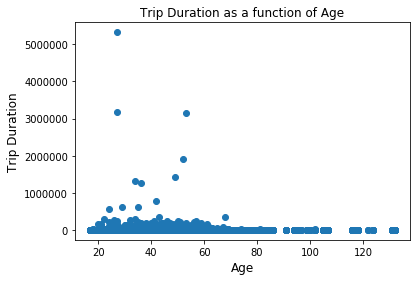

In [22]:
x = (df['Age'])
y = df['Trip Duration']
pl.scatter(x,y)
pl.title('Trip Duration as a function of Age')
pl.xlabel('Age', fontsize = 12)
pl.ylabel('Trip Duration', fontsize = 12)

In [23]:
df.drop(['Trip Duration' , 'Gender', 'Age'], axis=1, inplace=True)

In [24]:
df.head()

,User Type,date
0,1.0,2017-01-01 00:00:21
1,1.0,2017-01-01 00:00:45
2,0.0,2017-01-01 00:00:57
3,0.0,2017-01-01 00:01:10
4,0.0,2017-01-01 00:01:25


In [25]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,User Type
count,723483.000000
mean,0.968184
std,0.175509
min,0.000000
25%,NaN
50%,NaN
75%,NaN
max,1.000000


Text(0,0.5,'Number of rides')

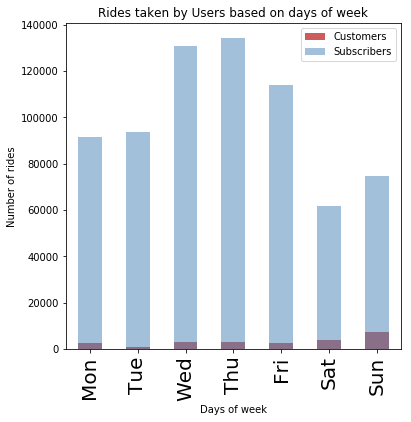

In [26]:
fig = pl.figure(figsize(6,6))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_c = 1
((df['date'][df['User Type'] == 0].groupby([df['date'].dt.weekday]).count()) / norm_c).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='Customers')

norm_s = 1
ax = ((df['date'][df['User Type'] == 1].groupby([df['date'].dt.weekday]).count()) / norm_s).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='Subscribers')

tmp = ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
pl.legend()
pl.title('Rides taken by Users based on days of week')
pl.xlabel('Days of week')
pl.ylabel('Number of rides')

### Figure 1a: Distribution of Citibike bikers by Customer types  in July 2017, absolute counts

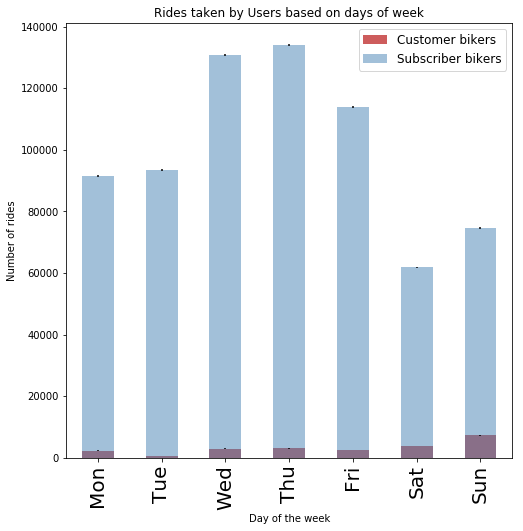

In [27]:
# Calculating errors
fig=pl.figure(figsize(8,8))

counts_c = df.date[df['User Type'] == 0].groupby([df.date.dt.weekday]).count()
norm_c = 1
error_c = np.sqrt(counts_c)
ax=((counts_c) / norm_c).plot(kind="bar",color='IndianRed',  yerr=[
            ((error_c) / norm_c, (error_c) / norm_c)], label='customers bikers')


counts_s = df.date[df['User Type']==1].groupby([df.date.dt.weekday]).count()
norm_s = 1
error_s=np.sqrt(counts_s)
((counts_s) / norm_s).plot(kind="bar", alpha=0.5, yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                           color='SteelBlue', label='subscribers bikers')
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
pl.title('Rides taken by Users based on days of week')
pl.legend(['Customer bikers','Subscriber bikers'],fontsize=12)

### Figure 1b: Distribution of Citibike bikers by Customer types  in July 2017, absolute counts, with statistical errors

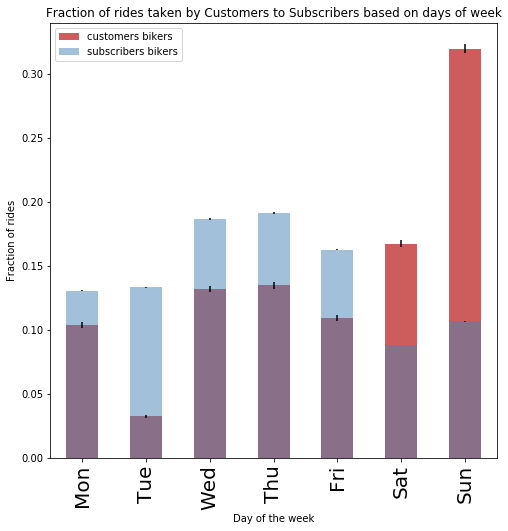

In [28]:
fig = pl.figure(figsize(8,8))

norm_c = counts_c.sum()
error_c = np.sqrt(counts_c)
((counts_c) / norm_c).plot(kind="bar", color='IndianRed',  
                           yerr=[((error_c) / norm_c, (error_c) / norm_c)], 
                           label='Customer bikers')

norm_s = counts_s.sum()
ax = ((counts_s) / norm_s).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_s) / norm_s, (error_s) / norm_s)], 
                                color='SteelBlue', label='Subscriber bikers')

ax.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Day of the week")
pl.title('Fraction of rides taken by Customers to Subscribers based on days of week')

pl.legend(['customers bikers','subscribers bikers'],fontsize=10)

### Figure 1c: Distribution of Citibike bikers by Customer types  in July 2017, Normalized

### Based on the Advise Provided by My Peers I Decided to Carry out a Z-Test as it would well suit my problem definition and model justification.

In [35]:
df.columns

Index(['User Type', 'date', 'weekend', 'weekday'], dtype='object')

In [29]:
df['weekend'] = df.date.dt.weekday == (0 or 1)
df['weekday'] = df.date.dt.weekday != (0 or 1)

In [30]:
df.weekday = df.weekday.replace(False, 0)
df.weekday = df.weekday.replace(True, 1)
df.weekend = df.weekend.replace(False, 0)
df.weekend = df.weekend.replace(True, 1)

In [36]:
df_wkd = pd.DataFrame()
df_week = pd.DataFrame()

In [37]:
df_wend_c = df[(df['User Type']==0) & (df.date.dt.weekday == (0 or 1))]
df_wend_s = df[(df['User Type']==1) & (df.date.dt.weekday == (0 or 1))]

df_week_c = df[(df['User Type']==0) & (df.date.dt.weekday != (0 or 1))]
df_week_s = df[(df['User Type']==1) & (df.date.dt.weekday != (0 or 1))]

In [38]:
df_wend_c.head()


,User Type,date,weekend,weekday
25027,0.0,2017-01-03 02:05:08,True,False
25037,0.0,2017-01-03 02:31:40,True,False
25067,0.0,2017-01-03 03:57:51,True,False
25461,0.0,2017-01-03 06:24:40,True,False
26927,0.0,2017-01-03 07:46:44,True,False


In [39]:
df_week_c.head()


,User Type,date,weekend,weekday
2,0.0,2017-01-01 00:00:57,False,True
3,0.0,2017-01-01 00:01:10,False,True
4,0.0,2017-01-01 00:01:25,False,True
18,0.0,2017-01-01 00:09:30,False,True
24,0.0,2017-01-01 00:11:34,False,True


In [40]:
ratio_weekend = df_wend_c.count() / df_wend_s.count()
ratio_weekday = df_week_c.count() / df_week_s.count()

In [41]:
ratio_weekend = df_wend_c.count() / df_wend_s.count()
ratio_weekday = df_week_c.count() / df_week_s.count()

In [42]:
ratio_weekday.mean()


0.036685366878382718

In [43]:
ratio_weekend.mean()


0.0080410607356715142

In [44]:
df.describe()


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,User Type
count,723483.000000
mean,0.968184
std,0.175509
min,0.000000
25%,NaN
50%,NaN
75%,NaN
max,1.000000


In [45]:
z_test = (ratio_weekend.mean()-ratio_weekday.mean())/(0.389125/len(df)**0.5)
print (z_test)

-62.7508454482


### The P Value for Z-Test value of -62.7508454482 is very low, almost equal to zero & hence p-value < 0.05, thus the Null Hypothesis can be rejected.
